In [7]:
from lifelines import KaplanMeierFitter
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('AriportsFlows2014classEwithTravelTimes.csv',usecols=['IATA_ORIG','IATA_DEST','EVENT_A_DT_UTC',
                 'EVENT_I_DT_UTC'],parse_dates=['EVENT_A_DT_UTC','EVENT_I_DT_UTC'])
df.head()

,IATA_ORIG,IATA_DEST,EVENT_A_DT_UTC,EVENT_I_DT_UTC
0,BRU,SHA,2014-07-04 14:35:00,2014-08-26 01:46:00
1,SEL,BJS,2014-07-01 08:00:00,2014-08-08 11:36:00
2,BRU,SHA,2014-07-07 10:56:00,2014-08-25 03:34:00
3,HKG,CAN,2014-07-07 04:46:00,2014-08-09 03:51:00
4,SEL,SHA,2014-07-07 02:28:00,2014-07-11 03:06:00


In [19]:
df['days']=map(lambda x: x.total_seconds()/60./60/24, df['EVENT_I_DT_UTC']-df['EVENT_A_DT_UTC'])

In [20]:
kmf = KaplanMeierFitter()

In [21]:
kmf.fit(df['days'])

<lifelines.KaplanMeierFitter: fitted with 20252952 observations, 0 censored>

(0, 50)

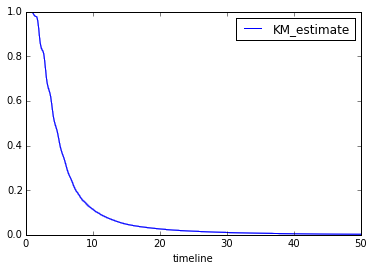

In [24]:
%matplotlib inline
kmf.plot()
plt.xlim(0,50)

In [ ]:
gps=df.groupby(['IATA_ORIG','IATA_DEST']).groups


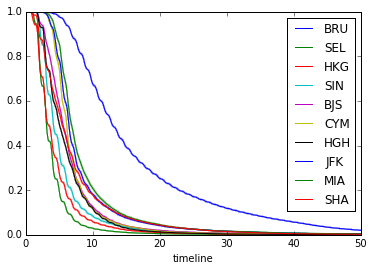

In [45]:
T=df['days']

ax = plt.subplot(111)
for a in df['IATA_ORIG'].unique()[:10]:
    ix = df['IATA_ORIG'] == a
    kmf.fit(T.ix[ix], label=a)
    ax=kmf.plot(ax=ax)
    ax.set_xlim(0,50)